In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from tp3.tsp import EuclideanTravelingSalesProblemGenerator, TspAutomapper

In [2]:
from tp3.kohonen import CircularDataGenerator, KohonenNetwork, SquareDataGenerator, TriangleDataGenerator
import tp3.tp3 as auxTp

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)

## Resuelva (aproximadamente) el “Traveling salesman problem” para 200 ciudades con una red de Kohonen.

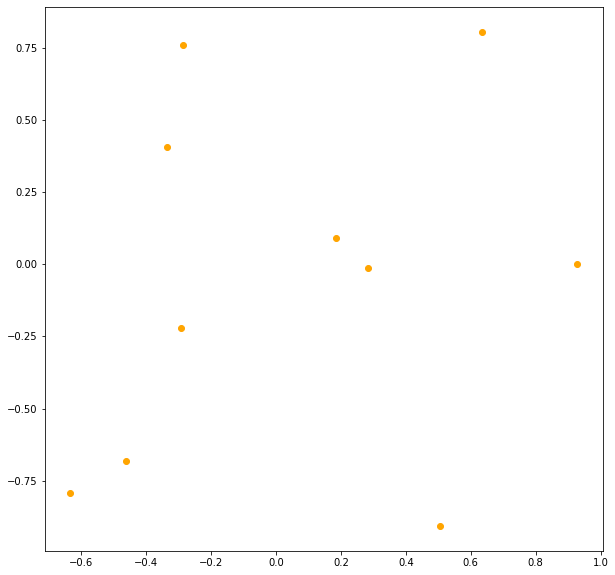

In [4]:
N = 10
sg = SquareDataGenerator()
target = sg.generate(N)
_ = plt.scatter(target[:, 0], target[:, 1], c="orange")

ta = TspAutomapper(N)
ta.set_target(target)
ta.train(100)

### Distribución circular

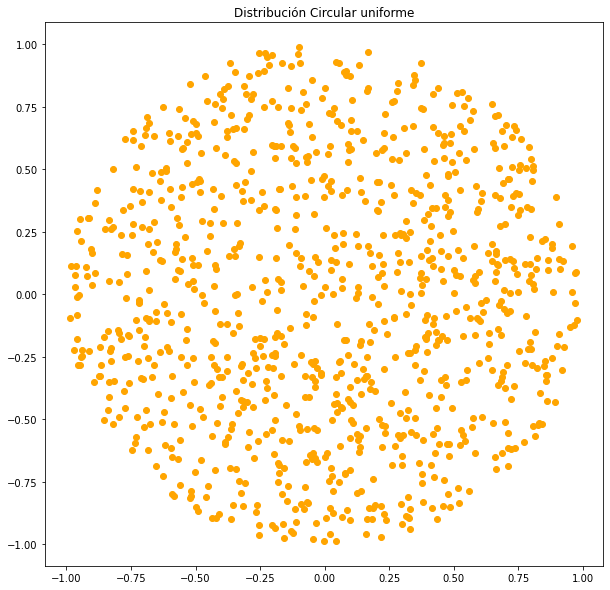

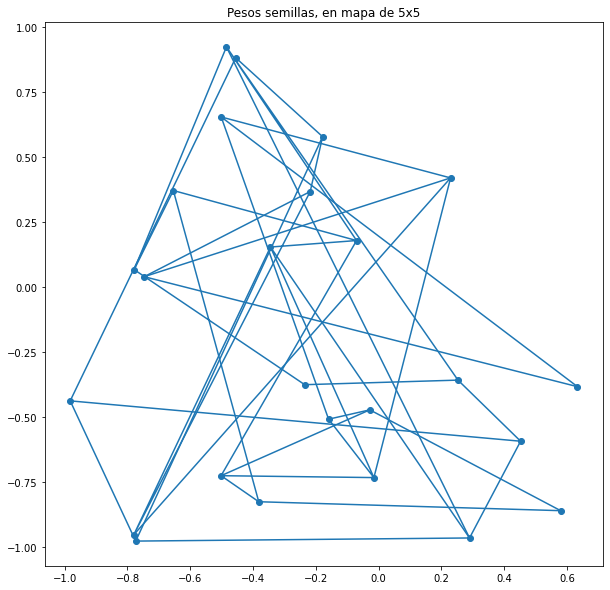

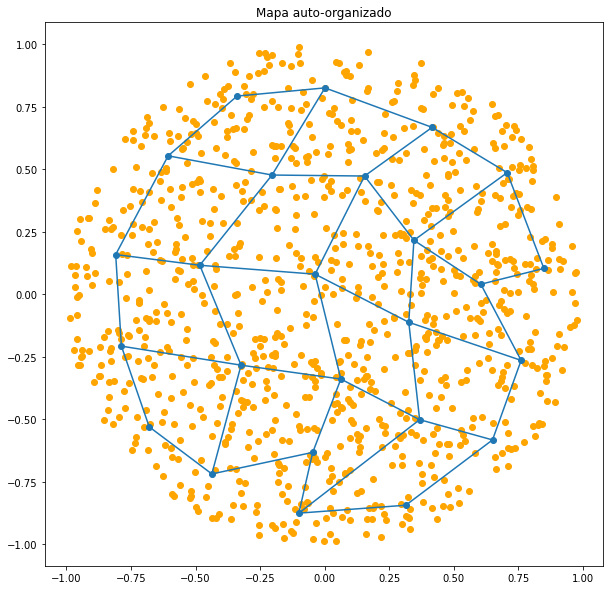

In [5]:
auxTp.plot_map_for_distribution(CircularDataGenerator())

### Distribución Cuadrada

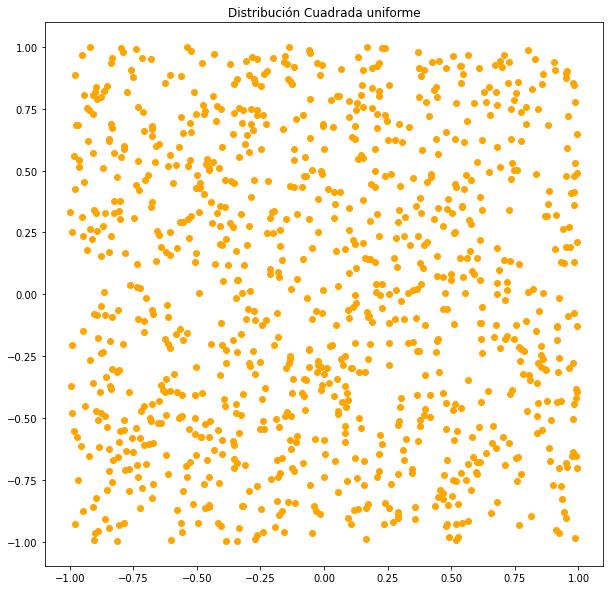

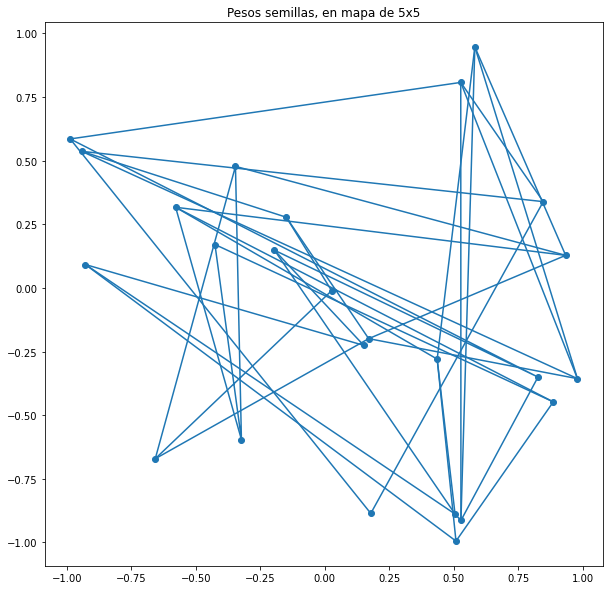

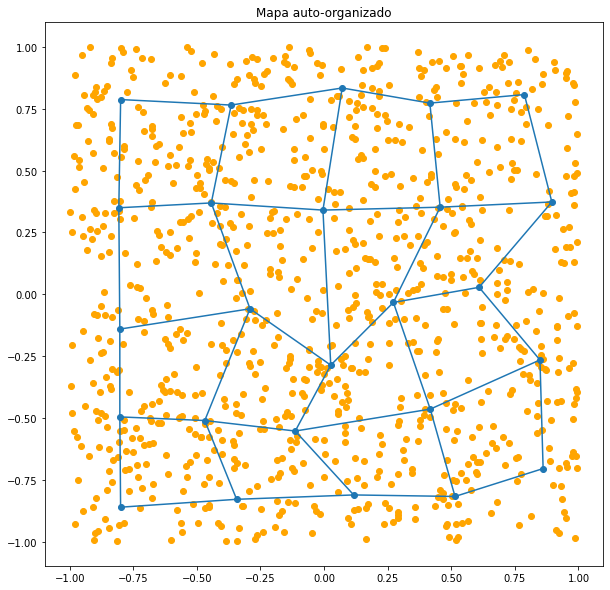

In [6]:
auxTp.plot_map_for_distribution(SquareDataGenerator())

### Distribución Triangular

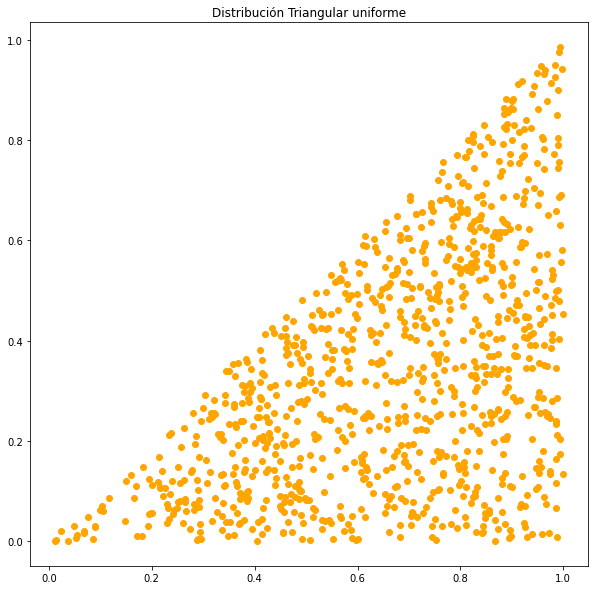

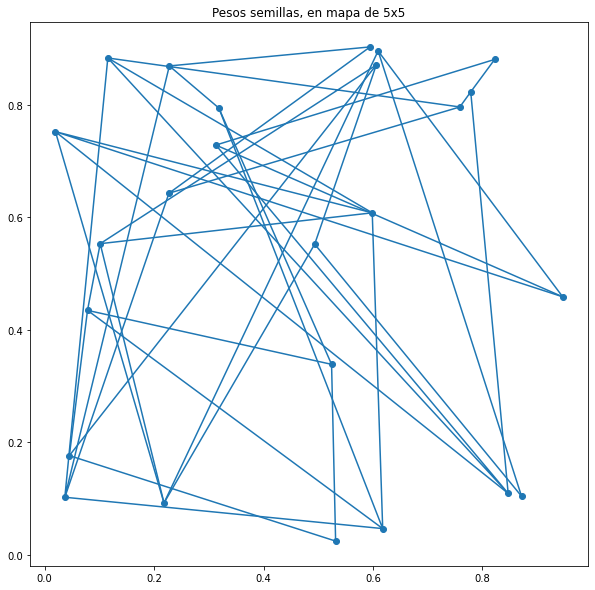

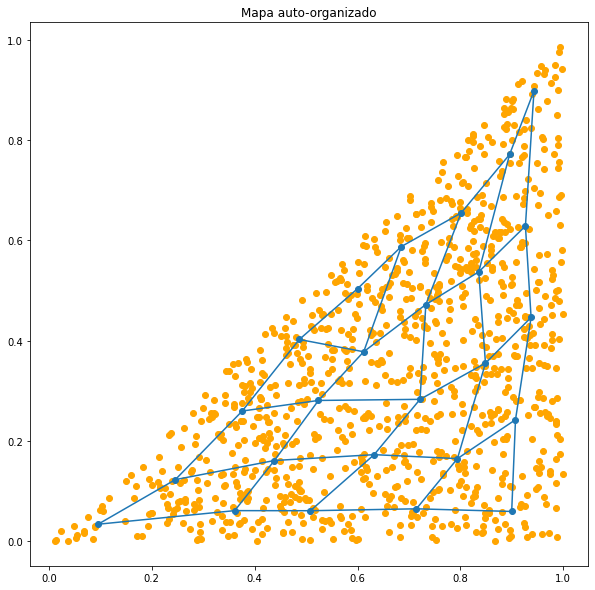

In [7]:
auxTp.plot_map_for_distribution(TriangleDataGenerator())

In [356]:
import tp3

In [357]:
from tp3.kohonen import CircularDataGenerator, KohonenNetwork

target = CircularDataGenerator().generate(50)
kn = KohonenNetwork([11, 11])
kn.set_target(target)



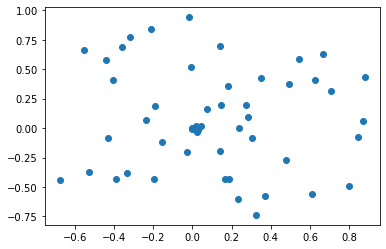

In [358]:
plt.scatter(target[:,0],target[:,1])

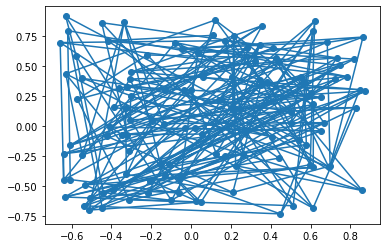

In [359]:
xx=kn.weights_map[:,:,0]
yy=kn.weights_map[:,:,1]

plt.scatter(xx,yy)

segs1 = np.stack((xx,yy), axis=2)
segs2 = segs1.transpose(1,0,2)
plt.gca().add_collection(LineCollection(segs1))
plt.gca().add_collection(LineCollection(segs2))
plt.show()

In [360]:
kn.train(50)

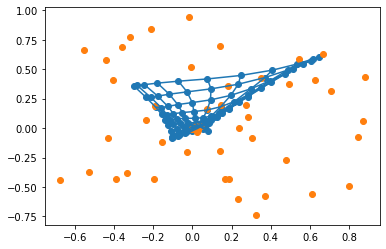

In [361]:
xx=kn.weights_map[:,:,0]
yy=kn.weights_map[:,:,1]

plt.scatter(xx,yy)

segs1 = np.stack((xx,yy), axis=2)
segs2 = segs1.transpose(1,0,2)
plt.gca().add_collection(LineCollection(segs1))
plt.gca().add_collection(LineCollection(segs2))
plt.scatter(target[:,0],target[:,1])

In [362]:
target[:,0]

array([-0.01689951, -0.55028657,  0.28097793,  0.60846805, -0.026205  ,
        0.54289913,  0.23121774, -0.2391745 ,  0.14220762,  0.84305956,
       -0.39049501,  0.62375385, -0.31761791,  0.14775414, -0.33583567,
       -0.19539931, -0.21242586, -0.19084268,  0.35046866,  0.32300165,
        0.80085668, -0.52826321,  0.86848576, -0.0068067 ,  0.30333172,
       -0.67426083,  0.87754734,  0.02774313, -0.15511185,  0.04214271,
        0.18558013,  0.27335166, -0.00212672, -0.35899932, -0.44217468,
        0.37230023,  0.1416241 ,  0.47549791, -0.43085456,  0.23915012,
        0.02023394, -0.40295499,  0.16671351,  0.70885675,  0.66785511,
        0.07416925,  0.49445902, -0.00447479,  0.18119016,  0.02119728])